In [10]:
# !jupyter nbextension enable widgetsnbextension --user --py
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [15]:
import ipywidgets
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from ipywidgets.embed import embed_minimal_html

paths = ['./logs_2024-02-10_13-48-40/images2/trace2024-02-10_13-49-07.png',
         './logs_2024-02-10_13-48-40/images2/trace2024-02-10_13-49-33.png',
         './logs_2024-02-10_13-48-40/images2/trace2024-02-10_13-49-54.png',
         './logs_2024-02-10_13-48-40/images2/trace2024-02-10_13-50-16.png',
         './logs_2024-02-10_13-48-40/images2/trace2024-02-10_13-50-42.png',
         './logs_2024-02-10_13-48-40/images2/trace2024-02-10_13-51-07.png']

data = [cv2.imread(p) for p in paths]
data = [cv2.resize(img, (300,300)) for img in data]
video = np.array(data)

actions = ['HANDLOOM 1.0', 'TUG-IP', 'TUG-IP', 'TUG-IP', 'TUG-IP', 'CEV-IP']
circles = [24, 24, 24, 30, 47, 47]
total_length = 47
crossings = [8, 8, 8, 8, 11, 11]
tangential_contacts = [2, 2, 1, 1, 0, 0]
endpt_contacts = [3, 2, 1, 0, 1, 1]

def plot_func(step=1):
    fig = plt.figure(figsize=(8,6.4))
    fig.suptitle('Policy Executed: ' + actions[step-1])
    gs = GridSpec(nrows=2, ncols=2, figure=fig, height_ratios=[1, 0.2], width_ratios=[1, 2])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    ax2.imshow(video[step-1])
    ax2.axis('off')
    ax2.set_title('Trace')

    contact_types = ['Crossings', 'Tangential', 'Endpoint']
    counts = [crossings[step-1], tangential_contacts[step-1], endpt_contacts[step-1]]
    bar_colors = ['tab:blue', 'tab:orange', 'tab:red']

    ax1.bar(contact_types, counts, color=bar_colors, align='center', width=0.2)
    ax1.set_title('Contact Types')

    ax3.set_title('Percentage Traced Correctly')
    start = 0
    perc_complete = circles[step-1]/total_length*100
    facecolor = 'red' if perc_complete < 100 else 'green'
#     if step-1 == 0:
#         facecolor = 'red' if perc_complete < 100 else 'green'
#     else:
#         if perc_complete < 100:
#             facecolor = 'red' if perc_complete < circles[step-2]/total_length*100 else 'blue'
#         else:
#             facecolor = 'green'

    ax3.broken_barh([(start, perc_complete)], [0, 5], facecolors=(facecolor))
    ax3.set_ylim(0, 5)
    ax3.set_xlim(0, 100)
    ax3.yaxis.set_visible(False)



In [16]:
interactive_plot = ipywidgets.interactive(plot_func, step=(1, len(data), 1))

embed_minimal_html('exported_plot.html', views=[interactive_plot], title='Interactive Plot Example')


interactive(children=(IntSlider(value=1, description='step', max=6, min=1), Output()), _dom_classes=('widget-i…

AttributeError: 'function' object has no attribute 'get_view_spec'

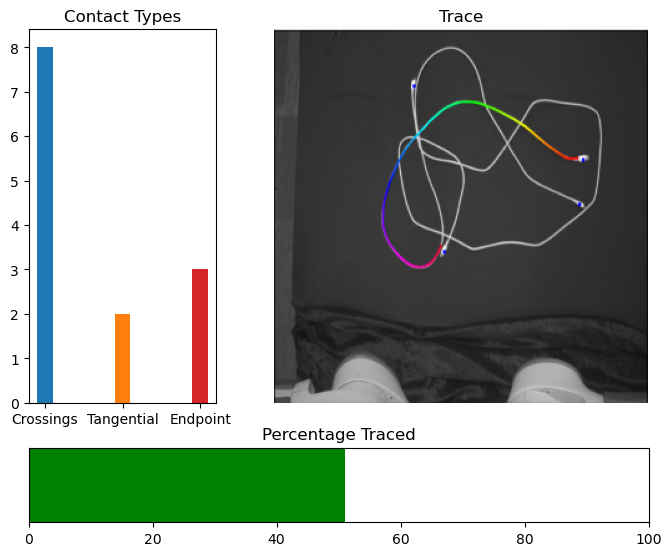

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,6.4))
# fig.suptitle('Action 'actions[0])
gs = GridSpec(nrows=2, ncols=2, figure=fig, height_ratios=[1, 0.2], width_ratios=[1, 2])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax2.imshow(video[0])
ax2.axis('off')
ax2.set_title('Trace')

contact_types = ['Crossings', 'Tangential', 'Endpoint']
counts = [crossings[0], tangential_contacts[0], endpt_contacts[0]]
bar_colors = ['tab:blue', 'tab:orange', 'tab:red']
# width = np.diff(contact_types).min()
ax1.bar(contact_types, counts, color=bar_colors, align='center', width=0.2)
ax1.set_title('Contact Types')
# Tell matplotlib to interpret the x-axis values as dates
# ax1.xaxis_date()

# Make space for and rotate the x-axis tick labels
# ax1.autofmt_xdate()

ax3.set_title('Percentage Traced')
start = 0
perc_complete = circles[0]/total_length*100

ax3.broken_barh([(start, perc_complete)], [0, 5], facecolors=('green'))
ax3.set_ylim(0, 5)
ax3.set_xlim(0, 100)
ax3.yaxis.set_visible(False)

In [ ]:
perc_complete


51.06382978723404